In [1]:
#In this notebook we created the Exploratory Data Analysis -- EDA --

In [2]:
# Constants
DATA_PATH = '../data/raw/train_users_2.csv'
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH2 = "../data/processed/2_preprocessed_df.pkl"

FIG_DIR = "../reports/figures"

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle
import os

%matplotlib inline

In [4]:
# Read Data 
raw_df = pd.read_pickle(EXPORT_PATH2)

In [5]:
df = raw_df.copy()

In [6]:
#Uni-Variate Visualization

In [57]:
print(df['age'].describe())

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


In [58]:
print(df.age.describe())

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


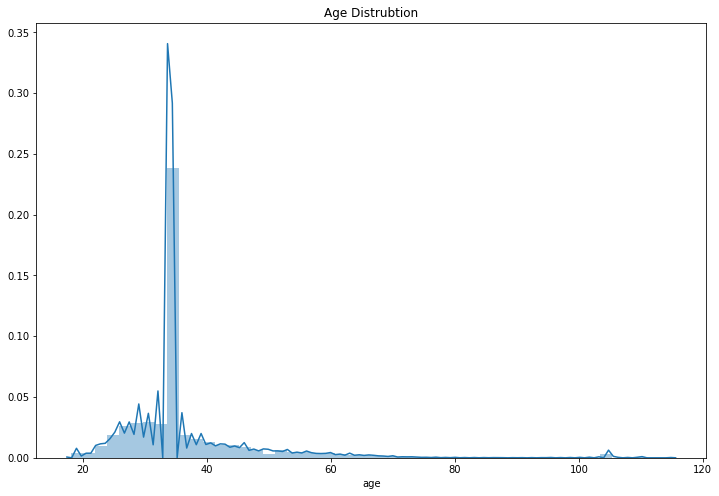

In [14]:
# Age Distrubtion
plt.figure(figsize=(12,8))
sns.distplot(df.age.dropna())
plt.title('Age Distrubtion')

plt.savefig(os.path.join(FIG_DIR, 'age_distribution_freq.png'))

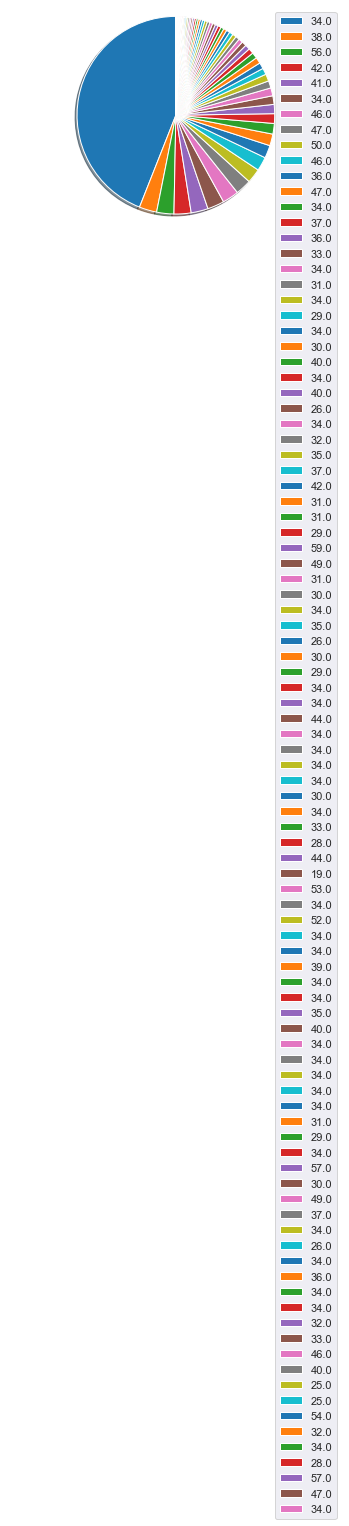

In [46]:
#using pie chart
labels = df['age']
sizes =  df['age'].value_counts()
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

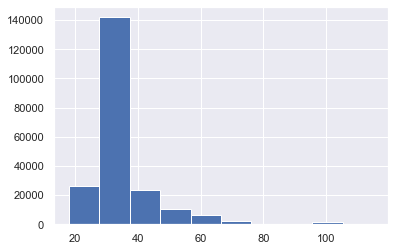

In [48]:
#Histogram
plt.hist(df['age'])
plt.show() 

In [49]:
# one way frequency table for the age column.
freq_table = pd.crosstab(df['age'], 'freq_of_ages')
freq_table

col_0,freq_of_ages
age,
18.0,669
19.0,1103
20.0,540
21.0,982
22.0,1702
...,...
110.0,196
111.0,2
112.0,1


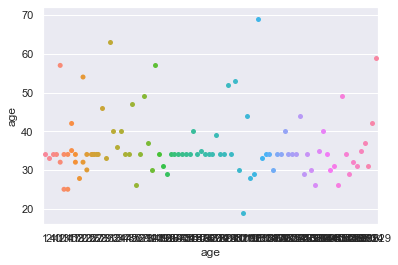

In [55]:
#sns.swarmplot(data=df, x=df['age'].value_counts(), y=df['age'])

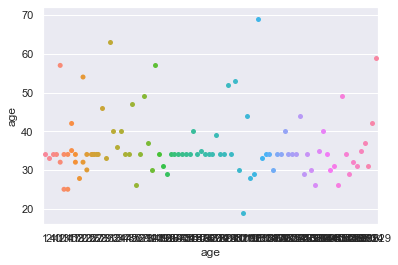

In [54]:
#sns.swarmplot(data=df, x=df['age'].value_counts(), y=df['age'].dropna())

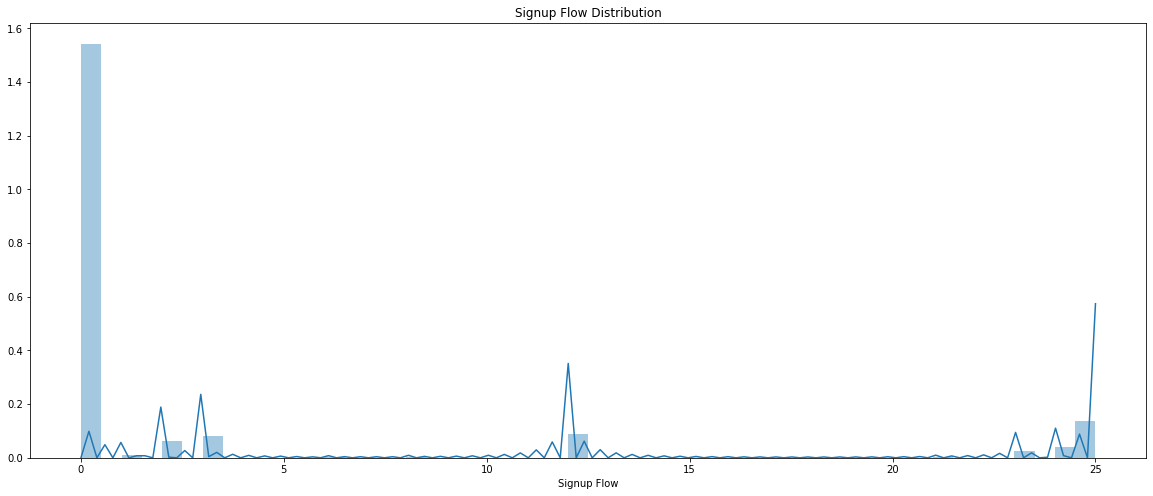

In [18]:
plt.figure(figsize=(20,6))
sns.distplot(df['signup_flow']);
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')

plt.savefig(os.path.join(FIG_DIR, 'Signup Flow Distribution.png'))

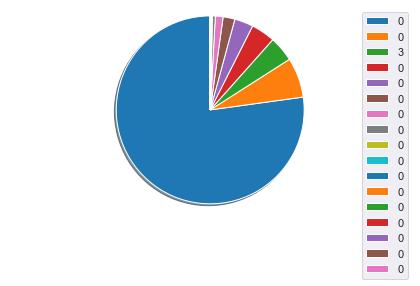

In [47]:
#using pie chart
labels = df['signup_flow']
sizes =  df['signup_flow'].value_counts()
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

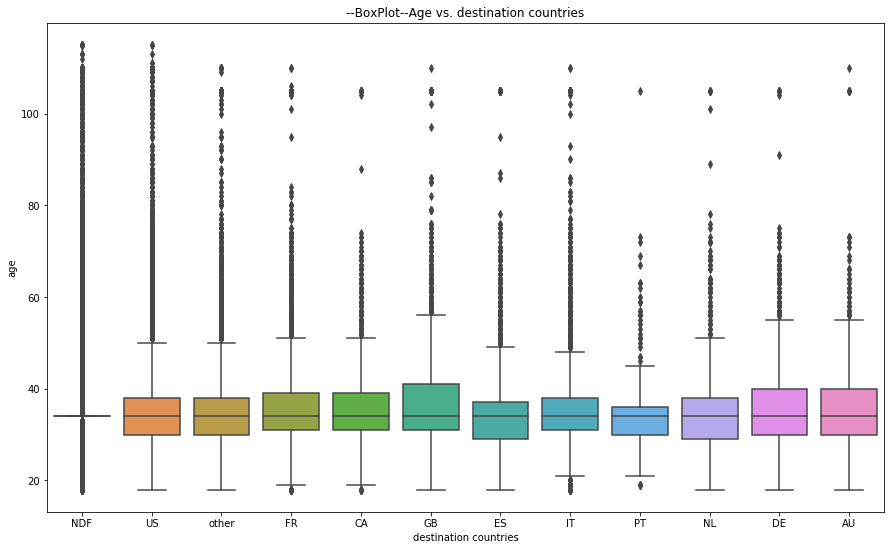

In [19]:
# Boxplot
plt.figure(figsize=(15,9))
sns.boxplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--BoxPlot--Age vs. destination countries');

plt.savefig(os.path.join(FIG_DIR, '--BoxPlot--Age vs. destination countries.png'))

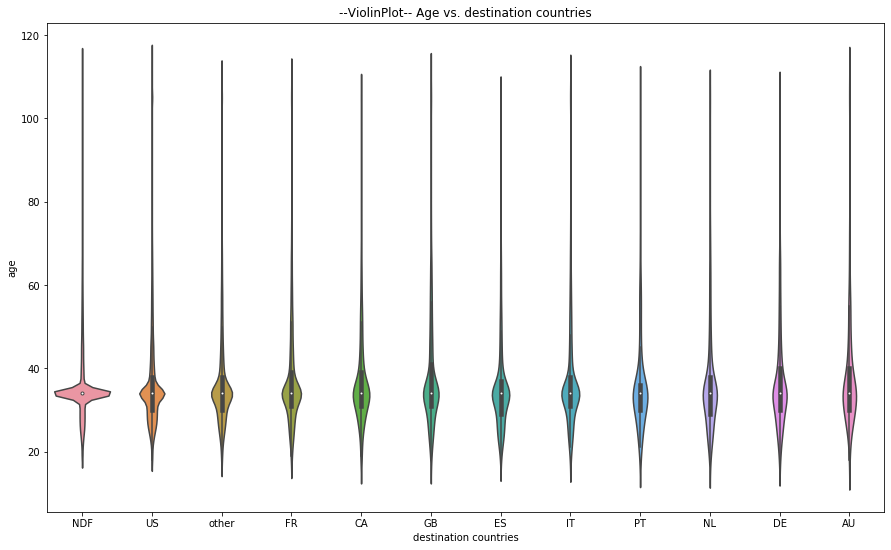

In [20]:
# Violin Plot
plt.figure(figsize=(15,9))
sns.violinplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--ViolinPlot-- Age vs. destination countries');

plt.savefig(os.path.join(FIG_DIR, '--ViolinPlot-- Age vs. destination countries.png'))

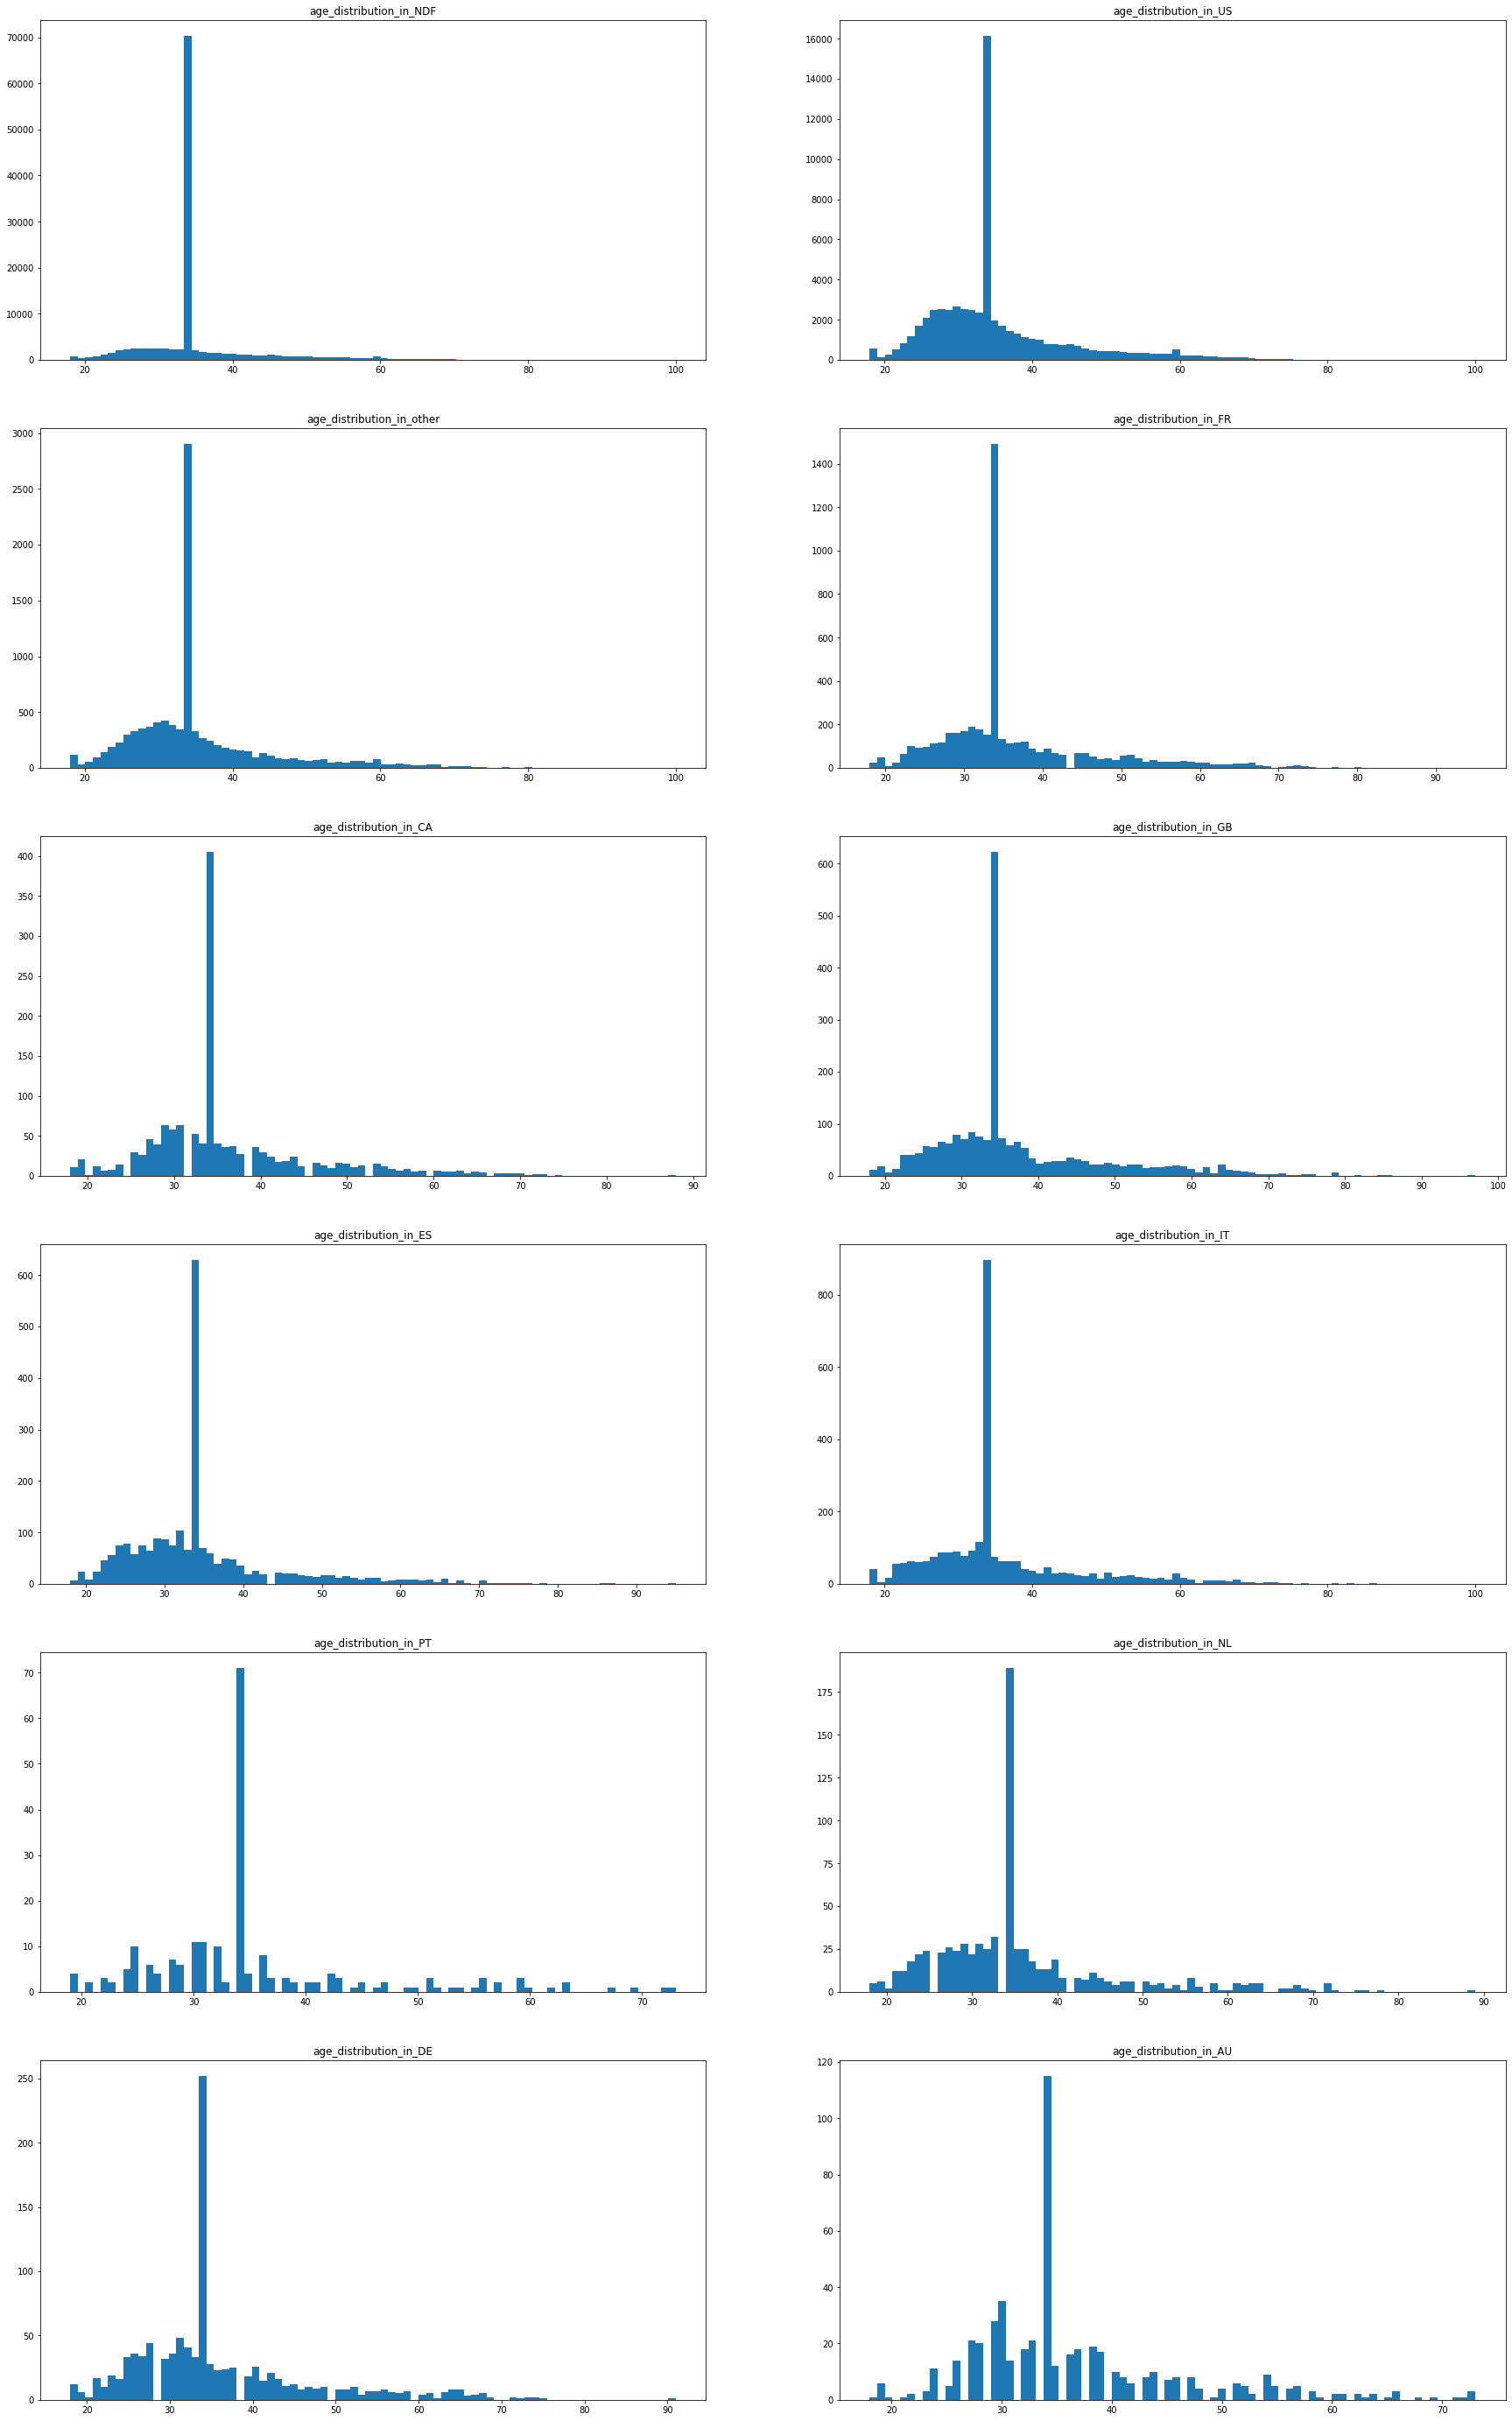

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 50))
i=0
j=0

#for col_cnts_df_list in ls_of_column_counts_df_lists[0:2]:
for country in df['country_destination'].unique():
    axes[i, j].hist(df[(df['age']<=100) & (df['country_destination']== country)]['age'], bins=80)
    axes[i, j].set_title('age_distribution_in_{}'.format(country))
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.xticks();

plt.savefig(os.path.join(FIG_DIR, 'Age dist vs. destination countries.png'))

In [22]:
#Bi-Variate Analysis

In [23]:
#add colores for plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

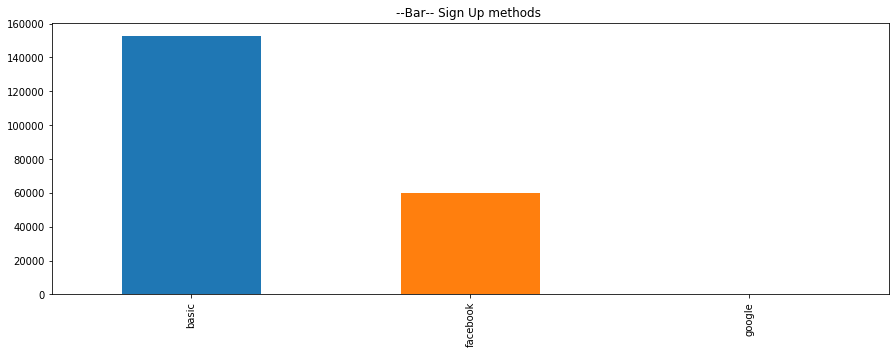

In [25]:
plt.figure(figsize = (15,5))
df.signup_method.value_counts(dropna=False).plot(kind='bar', color = colors)
plt.title("--Bar-- Sign Up methods ");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- Sign Up methods.png'))

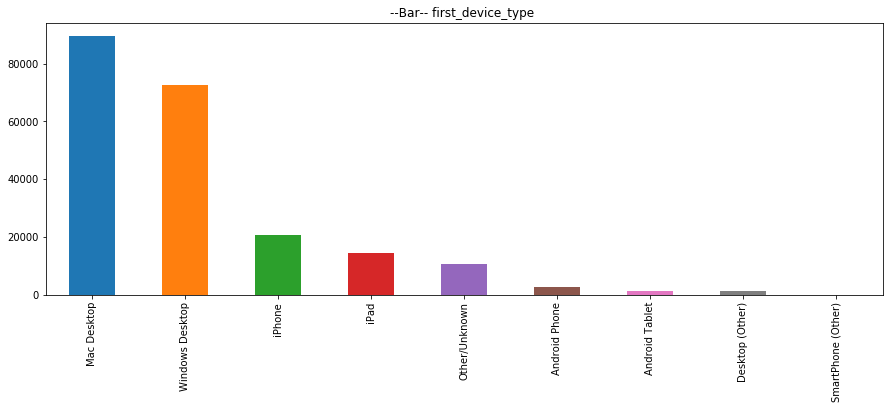

In [26]:
plt.figure(figsize = (15,5))
df.first_device_type.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.title("--Bar-- first_device_type ");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- first_device_type.png'))

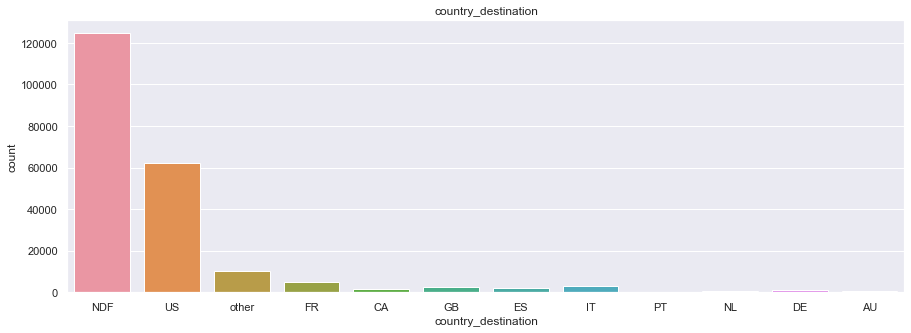

In [28]:
# destination country share

plt.figure(figsize=(15,5))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=df)

plt.title("country_destination");


plt.savefig(os.path.join(FIG_DIR, '--Bar-- country_destination.png'))

In [29]:
#Multi-variate Analysis and Visualization

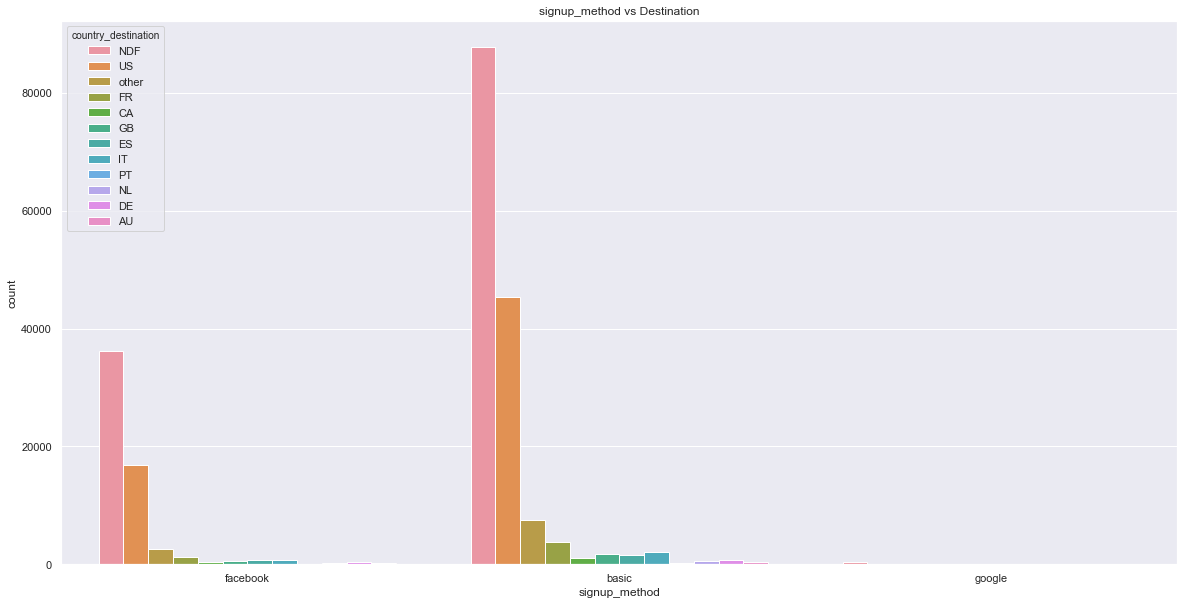

In [30]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=df)

plt.title("signup_method vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- signup_method vs Destination.png'))

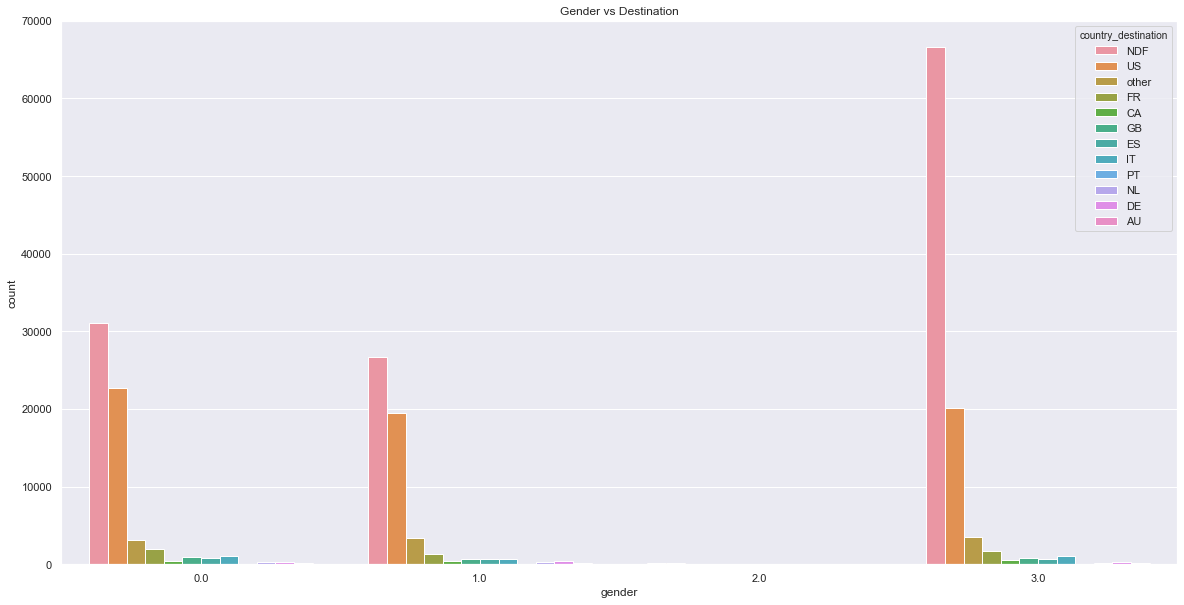

In [31]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=df)

plt.title("Gender vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- Gender vs Destination.pdf'))